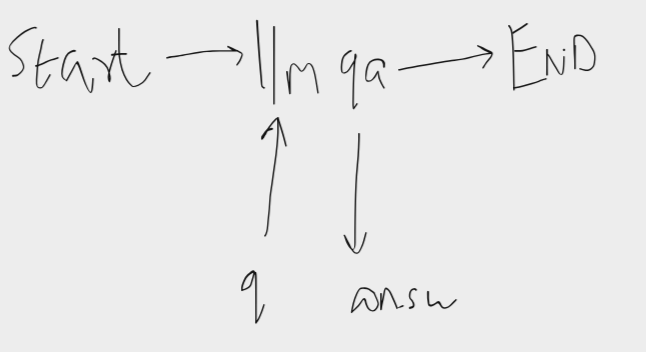


In [9]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict

In [10]:
load_dotenv()

True

In [11]:
# Import the model
model = ChatGroq(model="llama-3.1-8b-instant")

In [12]:
# create the class for the state


class LLMState(TypedDict):
    question: str
    answer: str

In [13]:
# create graphh

graph = StateGraph(LLMState)

In [14]:
def llm_qa(state: LLMState) -> LLMState:
    # extract question from state
    # Form a prompt using question and ask the question to llm and then update the answer in state

    question = state["question"]

    # prompt
    prompt = f"Answer the Following question {question}"

    # Response of llm

    response = model.invoke(prompt)

    # get the answer
    answer = response.content

    state["answer"] = answer

    return state

In [ ]:
# Add nodes
graph.add_node("llm_q_a", llm_qa)

# Add edges
graph.add_edge(START, "llm_q_a")
graph.add_edge("llm_q_a", END)

In [16]:
workflow = graph.compile()

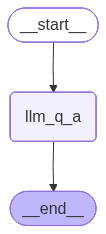

In [17]:
workflow

In [ ]:
question = {"question": "Difference Between Langchain and Lang Graph"}

result = workflow.invoke(question)
print(result["answer"])

In [ ]:
result["answer"]

'LangChain and LangGraph are both AI-related technologies, but they serve different purposes and have distinct differences.\n\n**LangChain**:\nLangChain is a framework for building large language models (LLMs) and multimodal models. It provides a set of APIs and tools that enable developers to integrate LLMs into their applications and develop new use cases for these models. LangChain is built on top of the Python programming language and utilizes the Transformers library from Hugging Face.\n\nKey features of LangChain:\n\n1. **LLM Integration**: LangChain allows developers to easily integrate LLMs into their applications.\n2. **Multimodal Support**: LangChain supports multimodal models, enabling developers to work with images, audio, and text data.\n3. **API-based**: LangChain provides a set of APIs that make it easy to interact with LLMs.\n\n**LangGraph**:\nLangGraph is a graph neural network (GNN) library designed for graph-structured data. It allows developers to build complex grap

In [23]:
question = {"question": "Difference Between Sun and Pluto in kilometers"}

result = workflow.invoke(question)
print(result["answer"])

The average distance of the Sun from the Earth is about 149.6 million kilometers (km). 

The average distance of Pluto from the Sun is about 5.906 billion kilometers (km). 

To find the difference, we subtract the distance of the Sun from the Earth (which is the closest the Earth is to the Sun) from the distance of Pluto from the Sun:

Difference = Distance of Pluto from the Sun - Distance of the Sun from the Earth
Difference = 5,906,000,000 km - 149,600,000 km
Difference ≈ 5,756,400,000 km

So, the difference between the Sun and Pluto in kilometers is approximately 5,756,400,000 km.


> The above is as simple as the below


In [25]:
result = model.invoke("Difference Between TensorFLow and PyTorch").content
print(result)

TensorFlow and PyTorch are two of the most popular deep learning frameworks used for building and training artificial neural networks. While both frameworks share some similarities, they also have several differences. Here's a comprehensive comparison of the two:

**Similarities:**

1. **Both are open-source**: TensorFlow and PyTorch are both open-source frameworks, which means they are free to use and contribute to.
2. **Deep learning capabilities**: Both frameworks provide a wide range of tools and libraries for building and training deep learning models.
3. **Support for automatic differentiation**: Both frameworks support automatic differentiation, which allows for easy computation of gradients during backpropagation.

**Differences:**

1. **Programming paradigm**:
	* **TensorFlow**: TensorFlow uses a declarative programming paradigm, where you define the computation graph and then run it. This makes it easier to use for CPU-based computations but can be less intuitive for GPU-base